In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")
train["traina"] = 1
test["traina"] = 0
data = train.append(test,sort=False)
data.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
traina                 0
dtype: int64

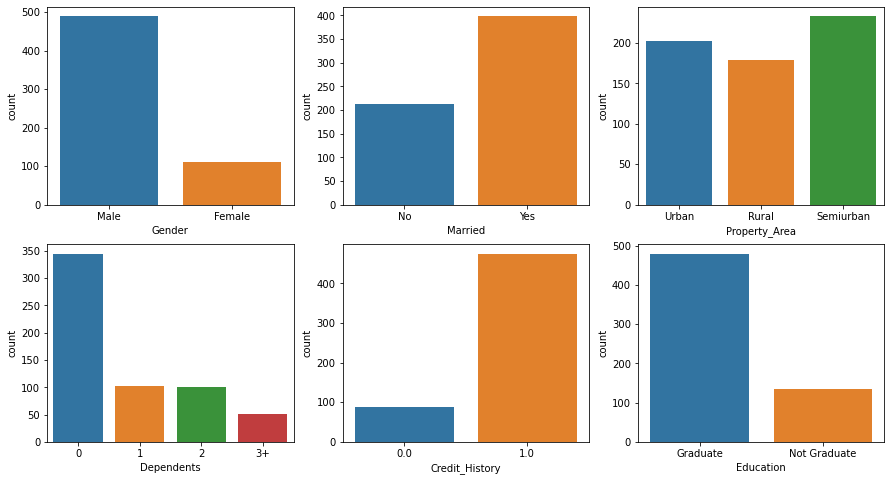

In [4]:
fig,ax = plt.subplots(2,3,figsize=(15,8))
sns.countplot("Gender",data=train,ax=ax[0,0])
sns.countplot("Married",data=train,ax=ax[0,1])
sns.countplot("Property_Area",data=train,ax=ax[0,2])
sns.countplot("Dependents",data=train,ax=ax[1,0])
sns.countplot("Credit_History",data=train,ax=ax[1,1])
sns.countplot("Education",data=train,ax=ax[1,2])

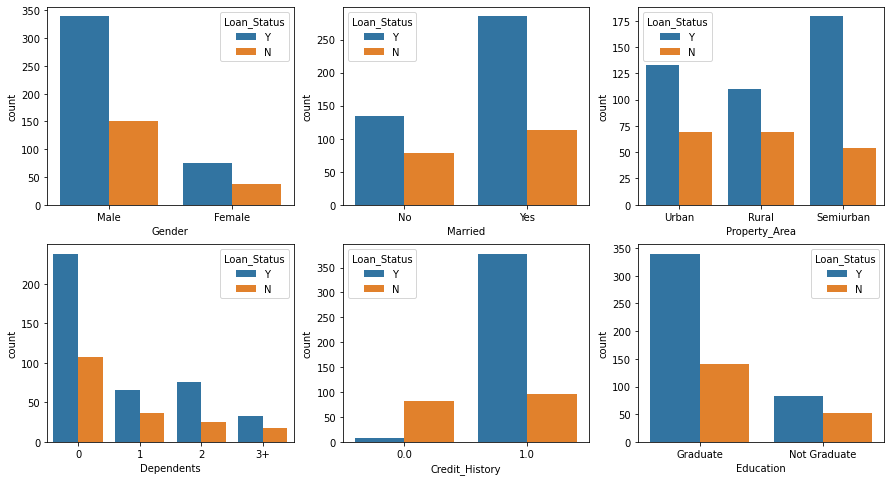

In [5]:
fig,ax = plt.subplots(2,3,figsize=(15,8))
sns.countplot("Gender",hue="Loan_Status",data=train,ax=ax[0,0])
sns.countplot("Married",hue="Loan_Status",data=train,ax=ax[0,1])
sns.countplot("Property_Area",hue="Loan_Status",data=train,ax=ax[0,2])
sns.countplot("Dependents",hue="Loan_Status",data=train,ax=ax[1,0])
sns.countplot("Credit_History",hue="Loan_Status",data=train,ax=ax[1,1])
sns.countplot("Education",hue="Loan_Status",data=train,ax=ax[1,2])

In [3]:
data["Gender"] = data["Gender"].replace(["Male","Female"],[1,0])
data["Married"] = data["Married"].replace(["Yes","No"],[1,0])
data["Education"] = data["Education"].replace(["Graduate","Not Graduate"],[1,0])
data["Dependents"] = data["Dependents"].replace(["0","1","2","3+"],[0,1,2,3])
data["Self_Employed"] = data["Self_Employed"].replace(["Yes","No"],[1,0])
data["Property_Area"] = data["Property_Area"].replace(["Rural","Urban","Semiurban"],[0,1,2])

In [4]:
# Check. If there are any duplicate values we can remove that.
train.apply(lambda x : len(x.unique()))

Loan_ID              614
Gender                 3
Married                3
Dependents             5
Education              2
Self_Employed          3
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
traina                 1
dtype: int64

In [5]:
train = data.query('traina == 1')
test = data.query('traina == 0')

In [6]:
train = train.dropna()
labels= train["Loan_Status"].values
loan_ID_train = train["Loan_ID"].values
train = train.drop(['Loan_ID','traina','Loan_Status'],axis=1)

In [7]:
loan_ID_test = test["Loan_ID"].values
test = test.drop(['Loan_ID','Loan_Status','traina'],axis=1)
test = test.dropna()

In [8]:
train["Gender"].value_counts()

1.0    394
0.0     86
Name: Gender, dtype: int64

In [9]:
train.apply(lambda x : len(x.unique()))

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      405
CoapplicantIncome    232
LoanAmount           186
Loan_Amount_Term       9
Credit_History         2
Property_Area          3
dtype: int64

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["Y","N"])
labels = le.transform(labels)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(train,labels, test_size=0.33, random_state=42)
clf = LogisticRegression(random_state=0).fit(X_train,y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

c:\users\kiet\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8050314465408805

In [21]:
from sklearn.metrics import roc_curve
y_pred_prob = clf.predict_proba(X_test)[:,1]
y_pred_prob

array([0.78282153, 0.77996228, 0.68192241, 0.20219467, 0.78527401,
       0.37785334, 0.75759115, 0.83415813, 0.87503259, 0.81238639,
       0.82947538, 0.82193745, 0.87426864, 0.82486471, 0.80852237,
       0.85003141, 0.22072367, 0.23562206, 0.85865853, 0.73058716,
       0.66988565, 0.7325744 , 0.81111281, 0.70639091, 0.73795753,
       0.81065411, 0.72285903, 0.22239884, 0.82251995, 0.79239757,
       0.76093159, 0.73724077, 0.659446  , 0.78535121, 0.79030894,
       0.73816513, 0.68255514, 0.82515061, 0.59887087, 0.3064124 ,
       0.78305946, 0.74642018, 0.65342691, 0.74030621, 0.75639404,
       0.1926551 , 0.73575599, 0.78085981, 0.81082605, 0.27982411,
       0.53435691, 0.80017136, 0.81038206, 0.76100818, 0.80621888,
       0.81036723, 0.82867757, 0.78029227, 0.77596926, 0.61887469,
       0.88044266, 0.69905453, 0.91209085, 0.08131219, 0.82287649,
       0.88574096, 0.77370002, 0.85082404, 0.86507177, 0.80349807,
       0.46358388, 0.82963881, 0.71375435, 0.80514632, 0.80799

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label = 1)

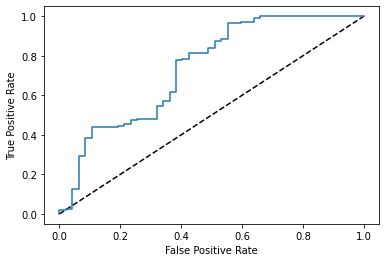

In [36]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="HAHA")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [39]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("Precision")
print(precision_score(y_test, y_pred))
print("Recall")
print(recall_score(y_test, y_pred))
print("F1-score")
print(f1_score(y_test, y_pred))

Precision
0.7832167832167832
Recall
1.0
F1-score
0.8784313725490196


In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
cnf_matrix =confusion_matrix(y_test, y_pred)
print("Confusion matrix : ")
print(cnf_matrix)
print("Accuracy : ",accuracy_score(y_test, y_pred))

Confusion matrix : 
[[ 16  31]
 [  0 112]]
Acuracy :  0.8050314465408805


In [25]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred_tree = tree.predict(X_test)
cnf_matrix =confusion_matrix(y_test, y_pred_tree)
print("Confusion matrix : ")
print(cnf_matrix)
print("Accuracy : ",accuracy_score(y_test, y_pred_tree))

Confusion matrix : 
[[27 20]
 [24 88]]
Acuracy :  0.7232704402515723


In [32]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
y_pred_forest = forest.predict(X_test)
cnf_matrix =confusion_matrix(y_test, y_pred_forest)
print("Confusion matrix : ")
print(cnf_matrix)
print("Accuracy : ",accuracy_score(y_test, y_pred_forest))

Confusion matrix : 
[[ 22  25]
 [  6 106]]
Acuracy :  0.8050314465408805


c:\users\kiet\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
